# Analysis of London Bike Hire Data:

### Abstract:
The Data being used:
- the main dataset that was being used is from the government website that colllects bike data.
- It is a very well structured dataset.

Methods of analysis
- The main methods of analysis and graphing I used was the Pandas Library, which is a popular library for data analysis
- matplotlib, which is a great library for graphing data.

### Keywords:
ill be talking a lot about(these are how I understand them to be):
- the Path, which just means the area of the bike
- the Direction, which is the direction that the bike is facing
- the mode, which means the kind of the bike
- the count, the kind of the bike

### Introduction
- the central.csv dataset is a dataset that has information on the different bike statistics in london
- its main purpose is to provide counts for the bikes in London
- However, it also has other data, including the location, time, and weather
- this dataset is generally a well constructued dataset that doesn't seem like it has any missing data

### Methods
I mainly used Pandas for organizing and shaping the data
- even though the dataset is pretty well organized and constructed, I will still take the precaution of cleaning out the data set:

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#creating a data frame for the file
path = "2022-Central.csv"
df = pd.read_csv(path)

# drop_duplicates is a function in pandas that removes all duplicates from the dataframe
# in this case there are no duplicates
df = df.drop_duplicates()

# standardise the capitalization of the dataset
# i will accomplish this by making everything lower case
# the functions that would make sense with this would probably be the Weahter, Day, Round,Direction, Path, and mode columns
columns_cap = ['Weather', 'Day', 'Round', 'Dir', 'Path', 'Mode']
for i in columns_cap:
    df[i] = df[i].str.lower()

# changing the dataset of the columns to bc consistent
# the only columns that would probably need data type conversion are the year and count columns
columns_type = ['Year', 'Count']
for i in columns_type:
    df[i] = pd.to_numeric(df[i])
df

,Year,UnqID,Date,Weather,Time,Day,Round,Dir,Path,Mode,Count
0,2022,CENCY001,13/07/2022,dry,06:00:00,weekday,a,northbound,carriageway,cargo bikes,0
1,2022,CENCY001,13/07/2022,dry,06:15:00,weekday,a,northbound,carriageway,cargo bikes,0
2,2022,CENCY001,13/07/2022,dry,06:30:00,weekday,a,northbound,carriageway,cargo bikes,0
3,2022,CENCY001,13/07/2022,dry,06:45:00,weekday,a,northbound,carriageway,cargo bikes,0
4,2022,CENCY001,13/07/2022,dry,07:00:00,weekday,a,northbound,carriageway,cargo bikes,0
...,...,...,...,...,...,...,...,...,...,...,...
370683,2022,CENCY702,14/06/2022,dry,20:45:00,weekday,a,southbound,pavement - southbound,pedestrians,87
370684,2022,CENCY702,14/06/2022,dry,21:00:00,weekday,a,southbound,pavement - southbound,pedestrians,81
370685,2022,CENCY702,14/06/2022,dry,21:15:00,weekday,a,southbound,pavement - southbound,pedestrians,76
370686,2022,CENCY702,14/06/2022,dry,21:30:00,weekday,a,southbound,pavement - southbound,pedestrians,63


Here I am going to get rid of the year and round columns.
- i decided to do this since the year is the same accross the dataset and the round column is said to be only useful when merging with another dataset about bikes
- i am not going to be merging with another dataset in this project

In [3]:
dropping = ['Year', 'Round']

df.drop(columns=dropping, inplace=True)
df

,UnqID,Date,Weather,Time,Day,Dir,Path,Mode,Count
0,CENCY001,13/07/2022,dry,06:00:00,weekday,northbound,carriageway,cargo bikes,0
1,CENCY001,13/07/2022,dry,06:15:00,weekday,northbound,carriageway,cargo bikes,0
2,CENCY001,13/07/2022,dry,06:30:00,weekday,northbound,carriageway,cargo bikes,0
3,CENCY001,13/07/2022,dry,06:45:00,weekday,northbound,carriageway,cargo bikes,0
4,CENCY001,13/07/2022,dry,07:00:00,weekday,northbound,carriageway,cargo bikes,0
...,...,...,...,...,...,...,...,...,...
370683,CENCY702,14/06/2022,dry,20:45:00,weekday,southbound,pavement - southbound,pedestrians,87
370684,CENCY702,14/06/2022,dry,21:00:00,weekday,southbound,pavement - southbound,pedestrians,81
370685,CENCY702,14/06/2022,dry,21:15:00,weekday,southbound,pavement - southbound,pedestrians,76
370686,CENCY702,14/06/2022,dry,21:30:00,weekday,southbound,pavement - southbound,pedestrians,63


This bar graph graphs the amount of bikes and other transportation on the raod. We could see that walking is still the dominant way of transportation

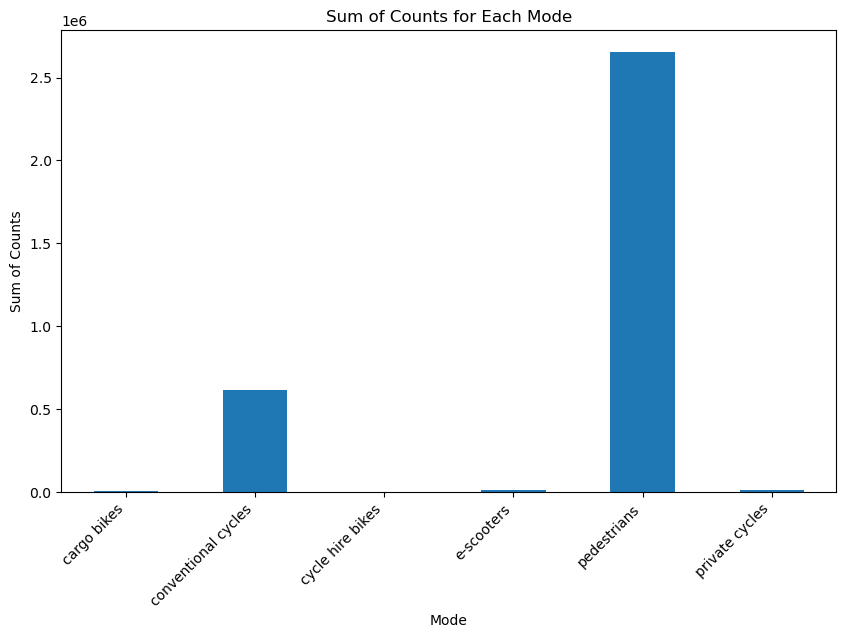

In [4]:

# Group by 'Mode' and calculate the sum of counts for each mode
sum_counts_mode = df.groupby('Mode')['Count'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
sum_counts_mode.plot(kind='bar')
plt.xlabel('Mode')
plt.ylabel('Sum of Counts')
plt.title('Sum of Counts for Each Mode')
plt.xticks(rotation=45, ha='right')
plt.show()

Here I made a graph of time vs counts graph. The graph peaks and then goes down and does that 2 more times. I think that this phenomenon could be explaint that the people going to work and getting off work and then the middle portion in the middle might be seem as a lunch break

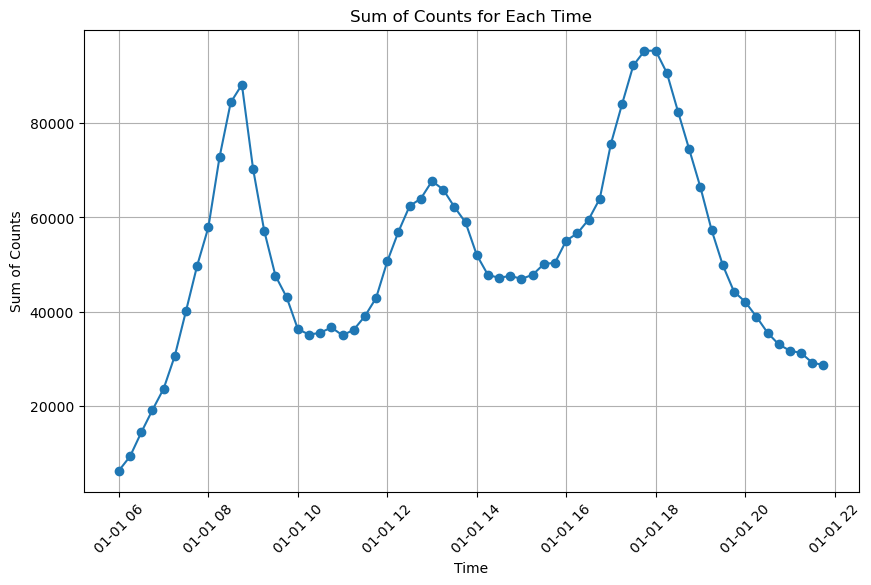

In [5]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Group by 'Time' and calculate the sum of counts for each time
sum_counts = df.groupby('Time')['Count'].sum()

# labelling the graph to make it look prettier and more user friendly
plt.figure(figsize=(10, 6))
plt.plot(sum_counts.index, sum_counts.values, marker='o')
plt.xlabel('Time')
plt.ylabel('Sum of Counts')
plt.title('Sum of Counts for Each Time')
# rotate for readabiity
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

I was curious about the graph before this text, and I tried to break its direction. Calculating the Northbound, Southbound, and the Westbound of the graph. 

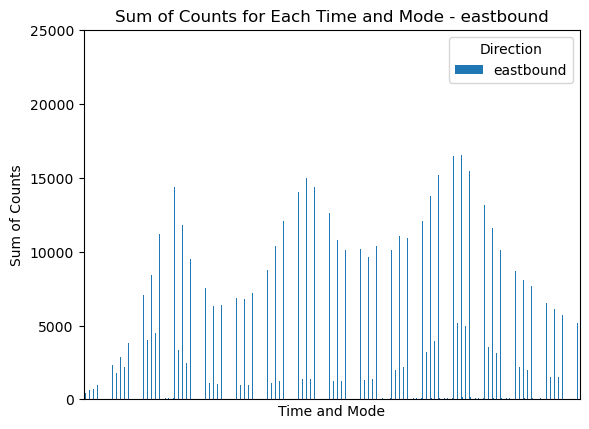

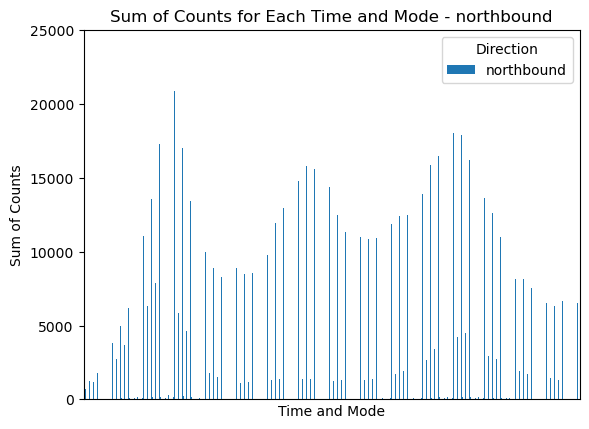

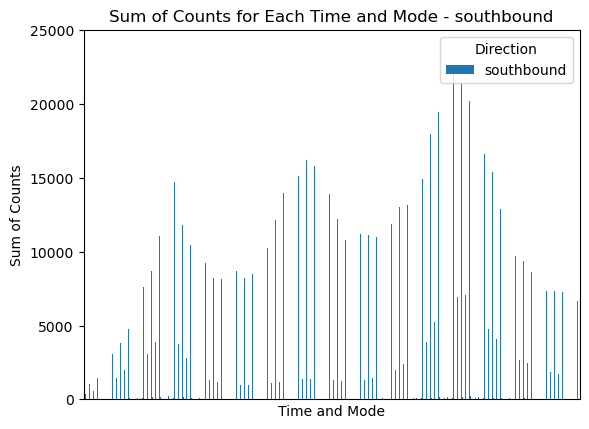

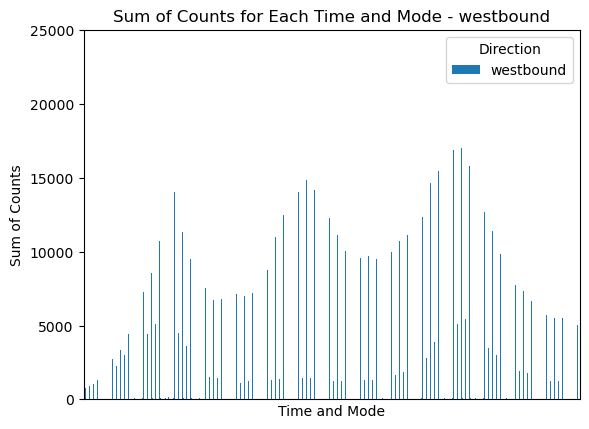

In [6]:

# calculate the sum of the dataset that is grouped by the time, mode and direction
sum_counts_time_mode_dir = df.groupby(['Time', 'Mode', 'Dir'])['Count'].sum().reset_index()

# Plot each direction on a separate graph
for direction, group in sum_counts_time_mode_dir.groupby('Dir'):
    # pivot_table creates a spreadsheet-style pivot table as a DataFrame.
    pivot_table = group.pivot_table(index=['Time', 'Mode'], columns='Dir', values='Count', fill_value=0)
    ax = pivot_table.plot(kind='bar', stacked=True)
    # hides x axis, since it is way too messy
    ax.set_xticks([])
    plt.xlabel('Time and Mode')
    plt.ylabel('Sum of Counts')
    plt.title(f'Sum of Counts for Each Time and Mode - {direction}')
    plt.legend(title='Direction', loc='upper right')
    # make a set range on all of these graphs so it is easier to compare 
    plt.ylim(0, 25000)  
    plt.show()

in each of the graphs, we could see that it follows the trend of the previous graphs when it wasnt split into the directions. However, the initial peak of sounthbound was low, but the peak aftwards was high, and northbound was the opposite of that, the people going northbound was the biggest in the morning, and then doesn't peak as high during the afternoon

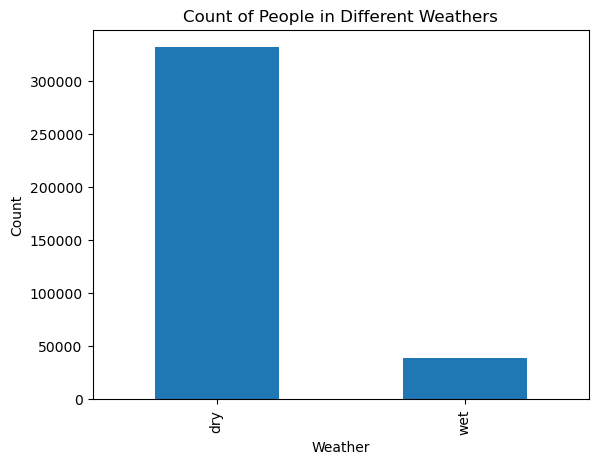

In [7]:
# Count the occurrences of each weather type
weather_counts = df['Weather'].value_counts()

# Create a bar chart
weather_counts.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of People in Different Weathers')
plt.show()

The bar graph shows that way more people are travelling in other transportation in dry weather. However, this migt be misleading, since it might be skewed due to other factors like there being less rainy days in the dataset in general or the fact that they didnt count the bikes during rainy weathers. 

### Results
- my findings found that Londoners typically travel in wet weather, as most poeple would. 
- we could see the peek communiting hours in London being somewhere in the begginging, midday and then in the afternoon
- unfortunately we dont know the actual times since the graph was way too messy with the x-axis labels on them
- we could also see that the most popular transport is by walking, and its not even close

### Conclusions:

- Londoners follow many other cities with their peek communiting hours, which a lot of the time is a high number of people in the monring, and afternoon when school and work are finished. There is also a middle section, which confused me of what it would be. So I thought that it was lunch break. 
- the directions of where you are going also follows the trend, however, there seems to be a lot less people going laterially, being East and West in London. So if ypou want to be faster, then you could potentially try to travel east and west more to your destination
- you could also see people coming from the north and south from the morning and afternoon. There is a large spike in the morning for poeple going northbound, and then a not as large spike for people going north in the afternoon. However, the south direction is kind of the opposite of the north direction. You could see that there is not as large a spike for people going south in the morning, but a huge spike for them in the afternoon.
- the most popular transportation is by foot, and it is more than twice as much as the second place, which are bikes. THis finding surpirsed me a bit, since I have seen a lot of bikes around London and the infrastructure for them is also very good.
Challenges:
- organizing the grpahs were a big challenge
- labelling and marking all the graphs were also something that I had to do